In [1]:
library(outbreaks)
data(influenza_england_1978_school)
Ndata <- 763
sol <- influenza_england_1978_school
sol$time <- as.numeric(sol$date-min(sol$date)) + 2
sol$I <- sol$in_bed
forfit.sol <- sol
noisy_I <- forfit.sol$I/Ndata
iniTime <- 0
iniI <- 1/Ndata

In [2]:
epi.data <- list(
  n_obs = length(noisy_I),
  t0 = iniTime,
  ts = forfit.sol$time,
  y_init = iniI,
  y = noisy_I,
  kb = 1,
  thetab = 1,
  kg = 1,
  thetag = 1,
  as = 9, #254,
  bs = 1#350-254
)

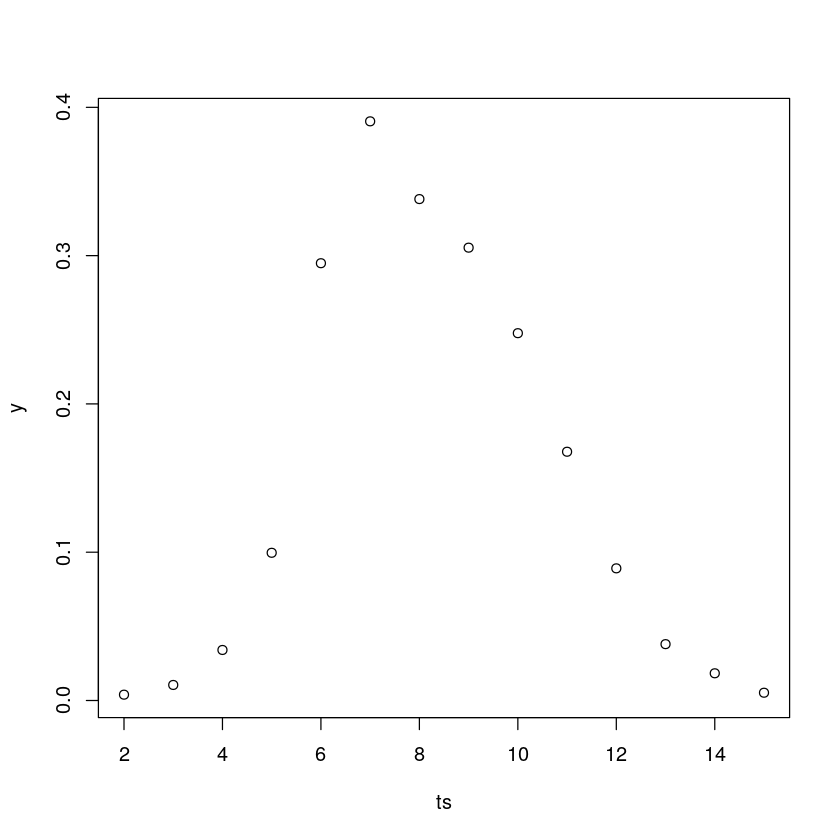

In [3]:
plot(epi.data$ts, epi.data$y, xlab = "ts", ylab = "y")

In [4]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
SIR_code <- stan_model(file = "stan/sir_simple_I_logn.stan")

Loading required package: StanHeaders
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [5]:
## We find the Maximum a posteriori estimates, just to see how well-posed the problem is
SIR.map <- optimizing(SIR_code, data = epi.data, hessian = TRUE, verbose = TRUE)

Chain 1: Initial log joint probability = -814.05
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1: Exception: lognormal_lpdf: Location parameter[4] is nan, but must be finite!  (in 'model269bb6c40a4_sir_simple_I_logn' at line 61)

Exception: lognormal_lpdf: Location parameter[8] is nan, but must be finite!  (in 'model269bb6c40a4_sir_simple_I_logn' at line 61)


Chain 1:       19       23.7026     0.0379507      0.117475           1           1       36   
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1:       32        31.556    0.00260751   0.000687928           1           1       80   
Chain 1: Optimization terminated normally: 
Chain 1:   Convergence detected: relative gradient magnitude is below tolerance


In [6]:
SIR.map

$par
   r_init[1]    r_init[2]         beta        gamma           S0        sigma 
0.5368535987 0.4507493026 1.8697568624 0.5814597967 0.9997691487 0.3861239849 
          R0   y_hat[1,1]   y_hat[2,1]   y_hat[3,1]   y_hat[4,1]   y_hat[5,1] 
3.2156253501 0.9957179244 0.9844141661 0.9459222536 0.8325758698 0.6023011593 
  y_hat[6,1]   y_hat[7,1]   y_hat[8,1]   y_hat[9,1]  y_hat[10,1]  y_hat[11,1] 
0.3494394245 0.1931661028 0.1191283743 0.0847400070 0.0677297439 0.0587356736 
 y_hat[12,1]  y_hat[13,1]  y_hat[14,1]   y_hat[1,2]   y_hat[2,2]   y_hat[3,2] 
0.0537342552 0.0508561780 0.0491630515 0.0030193734 0.0107725521 0.0368605776 
  y_hat[4,2]   y_hat[5,2]   y_hat[6,2]   y_hat[7,2]   y_hat[8,2]   y_hat[9,2] 
0.1105146687 0.2401034796 0.3236593826 0.2955899121 0.2193177734 0.1477818274 
 y_hat[10,2]  y_hat[11,2]  y_hat[12,2]  y_hat[13,2]  y_hat[14,2]   y_hat[1,3] 
0.0951129610 0.0597986717 0.0371227078 0.0228810943 0.0140444855 0.0012627022 
  y_hat[2,3]   y_hat[3,3]   y_hat[4,3]   y_hat[5,3]   y_hat[6,3]   y_hat[7,3] 
0.0048132818 0.0172171688 0.0569094615 0.1575953611 0.3269011929 0.5112439851 
  y_hat[8,3]   y_hat[9,3]  y_hat[10,3]  y_hat[11,3]  y_hat[12,3]  y_hat[13,3] 
0.6615538523 0.7674781656 0.8371572951 0.8814656547 0.9091430371 0.9262627277 
 y_hat[14,3]        y0[1]        y0[2]        y0[3]     y_rep[1]     y_rep[2] 
0.9367924630 0.9997691487 0.0002308513 0.0000000000 0.0038592077 0.0144906590 
    y_rep[3]     y_rep[4]     y_rep[5]     y_rep[6]     y_rep[7]     y_rep[8] 
0.0241178347 0.0573774601 0.1995631465 0.3368535335 0.2406354898 0.3947609761 
    y_rep[9]    y_rep[10]    y_rep[11]    y_rep[12]    y_rep[13]    y_rep[14] 
0.1221084308 0.1567815725 0.0502828334 0.0314671283 0.0105986973 0.0159263640 

$value
[1] 31.55605

$return_code
[1] 0

$hessian
         r_init.1 r_init.2         beta        gamma            S0
r_init.1        0        0     0.000000    0.0000000   0.000000000
r_init.2        0        0     0.000000    0.0000000   0.000000000
beta            0        0 -2374.701833  218.9040390 245.468108941
gamma           0        0   218.904039 -211.5340434 -35.719422292
S0              0        0   245.468109  -35.7194223 -30.813756071
sigma           0        0    -2.950454   -0.8819018   0.002807914
                 sigma
r_init.1   0.000000000
r_init.2   0.000000000
beta      -2.950454381
gamma     -0.881901838
S0         0.002807914
sigma    -10.577019516

$theta_tilde
     r_init[1] r_init[2]     beta     gamma        S0    sigma       R0
[1,] 0.5368536 0.4507493 1.869757 0.5814598 0.9997691 0.386124 3.215625
     y_hat[1,1] y_hat[2,1] y_hat[3,1] y_hat[4,1] y_hat[5,1] y_hat[6,1]
[1,]  0.9957179  0.9844142  0.9459223  0.8325759  0.6023012  0.3494394
     y_hat[7,1] y_hat[8,1] y_hat[9,1] y_hat[10,1] y_hat[11,1] y_hat[12,1]
[1,]  0.1931661  0.1191284 0.08474001  0.06772974  0.05873567  0.05373426
     y_hat[13,1] y_hat[14,1]  y_hat[1,2] y_hat[2,2] y_hat[3,2] y_hat[4,2]
[1,]  0.05085618  0.04916305 0.003019373 0.01077255 0.03686058  0.1105147
     y_hat[5,2] y_hat[6,2] y_hat[7,2] y_hat[8,2] y_hat[9,2] y_hat[10,2]
[1,]  0.2401035  0.3236594  0.2955899  0.2193178  0.1477818  0.09511296
     y_hat[11,2] y_hat[12,2] y_hat[13,2] y_hat[14,2]  y_hat[1,3]  y_hat[2,3]
[1,]  0.05979867  0.03712271  0.02288109  0.01404449 0.001262702 0.004813282
     y_hat[3,3] y_hat[4,3] y_hat[5,3] y_hat[6,3] y_hat[7,3] y_hat[8,3]
[1,] 0.01721717 0.05690946  0.1575954  0.3269012   0.511244  0.6615539
     y_hat[9,3] y_hat[10,3] y_hat[11,3] y_hat[12,3] y_hat[13,3] y_hat[14,3]
[1,]  0.7674782   0.8371573   0.8814657    0.909143   0.9262627   0.9367925
         y0[1]        y0[2] y0[3]    y_rep[1]    y_rep[2]  y_rep[3]   y_rep[4]
[1,] 0.9997691 0.0002308513     0 0.003647901 0.006570215 0.0416387 0.09533501
      y_rep[5]  y_rep[6] y_rep[7]  y_rep[8]  y_rep[9]  y_rep[10]  y_rep[11]
[1,] 0.2001788 0.5830807 0.360379 0.2657043 0.1129662 0.09703084 0.06908282
      y_rep[12]  y_rep[13]  y_rep[14]
[1,] 0.04072223 0.02970466 0.01157495


Divergences:


0 of 4000 iterations ended with a divergence.



Tree depth:


0 of 4000 iterations saturated the maximum tree depth of 10.



Energy:


E-BFMI indicated no pathological behavior.


Inference for Stan model: sir_simple_I_logn.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean   sd 2.5%  25%  50%  75% 97.5% n_eff Rhat
beta  1.81    0.00 0.13 1.56 1.74 1.81 1.89  2.05  2698    1
gamma 0.59    0.00 0.06 0.48 0.55 0.59 0.63  0.73  3256    1
S0    1.00    0.00 0.00 1.00 1.00 1.00 1.00  1.00  1476    1
R0    3.09    0.01 0.41 2.35 2.81 3.06 3.32  4.00  3398    1
sigma 0.50    0.00 0.12 0.33 0.41 0.48 0.57  0.80  1578    1

Samples were drawn using NUTS(dense_e) at Fri Sep 20 08:54:53 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

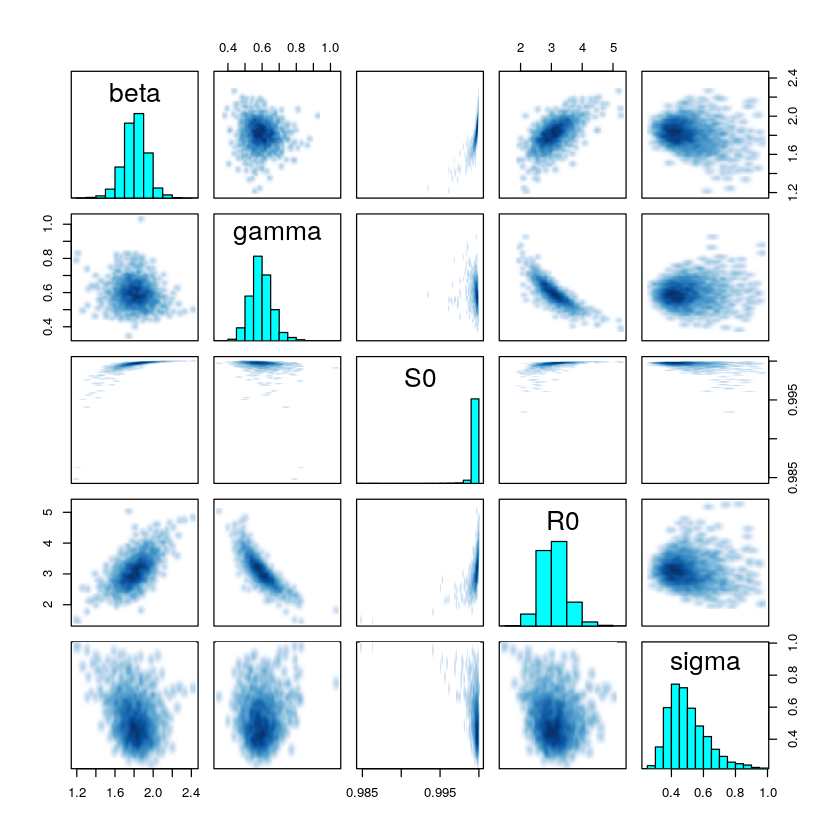

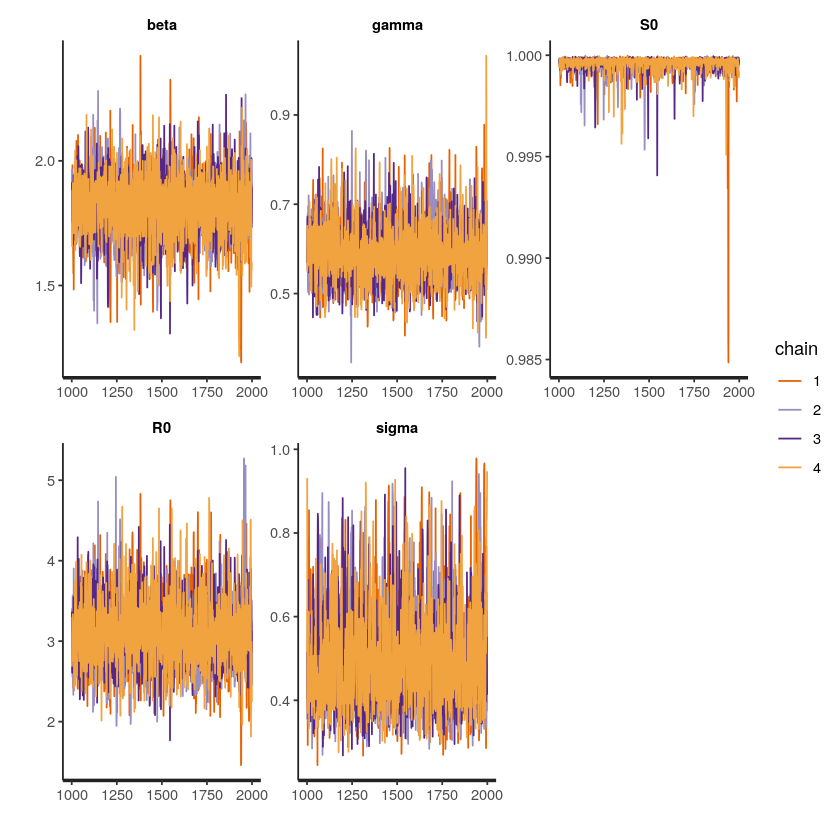

In [7]:
SIR.posterior <- sampling(SIR_code, data = epi.data,
                         chains = 4,
                         control = list(adapt_delta = .95, metric = 'dense_e'))
check_hmc_diagnostics(SIR.posterior)
print(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
pairs(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
stan_trace(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))

In [20]:
# Prior parameters
mu.b <- log(epi.data$kb / epi.data$thetab) - (0.5 * log(1 + 1 / epi.data$kb))
sd.b <- sqrt(log(1 + 1 / epi.data$kb))
mu.g <- log(epi.data$kg / epi.data$thetag) - (0.5 * log(1 + 1 / epi.data$kg))
sd.g <- sqrt(log(1 + 1 / epi.data$kg))

N <- 1
mu.r <- log(N) + mu.b - mu.g
sd.r <- sqrt(sd.b^2 + sd.g^2)

In [23]:
rnorm_trunc <- function(n, m, s, lb = 0, ub = 1){
  ql <- pnorm(q = lb, mean = m, sd = s)
  qu <- pnorm(q = ub, mean = m, sd = s)
  U <- runif(n = n, min = ql, max = qu)
  return(
    qnorm(U, mean = m, sd = s)
  ) 
}
## 
generate_lognormal_trajectory <- function(times,
                                          mu_b, sd_b,
                                          mu_g, sd_g,
                                          a_s, b_s,
                                          mu_s = .5, sd_s = .5){
  N <- length(times)  
  beta <- rlnorm(1, meanlog = mu_b, sdlog = sd_b)
  gamma <- rlnorm(1, meanlog = mu_g, sdlog = sd_g)
  sigma <- rnorm_trunc(1, m = mu_s, s = sd_s)
  S0 <- rbeta(n = 1, shape1 = a_s, shape2 = b_s)
  ## ODE solving
    require(deSolve)
  sir <- function(time, state, parameters) {
    with(as.list(c(state, parameters)), {
      dS <- -beta * S * I
      dI <-  beta * S * I - gamma * I
      dR <-                 gamma * I
      
      return(list(c(dS, dI, dR)))
    })
  }
  init       <- c(S = S0, I = 1-S0, R = 0.0)
  parameters <- c(beta = beta, gamma = gamma)
  sol <- as.data.frame(ode(y = init, times = times, func = sir, parms = parameters)) 
  ##
  traj <- 
    return(
      rlnorm(N, mean = log(sol$I), sd = sigma)
    )
}

In [33]:
Nrep <- 4000
prior.trajectories <- matrix(NA, ncol = length(epi.data$ts), nrow = Nrep)
for(i in 1:Nrep){
    prior.trajectories[i, ] <- suppressWarnings(
        generate_lognormal_trajectory(times = epi.data$ts,
                                   mu_b = mu.b, sd_b = sd.b,
                                   mu_g = mu.g, sd_g = sd.g,
                                   a_s = epi.data$as, b_s = epi.data$bs,
                                   mu_s = 0.5, sd_s = 0.5)
    )
}

In [34]:
prior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025, na.rm = TRUE))),
  post_mean = colMeans(prior.trajectories),
  upper = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975, na.rm = TRUE))),
  distribution = "prior"
)

In [28]:
posterior.trajectories <- extract(SIR.posterior, 'y_rep')$y_rep
posterior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025))),
  post_mean = colMeans(posterior.trajectories),
  upper = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975))),
  distribution = "posterior"
)

Warning message:
“Removed 13 rows containing missing values (geom_path).”

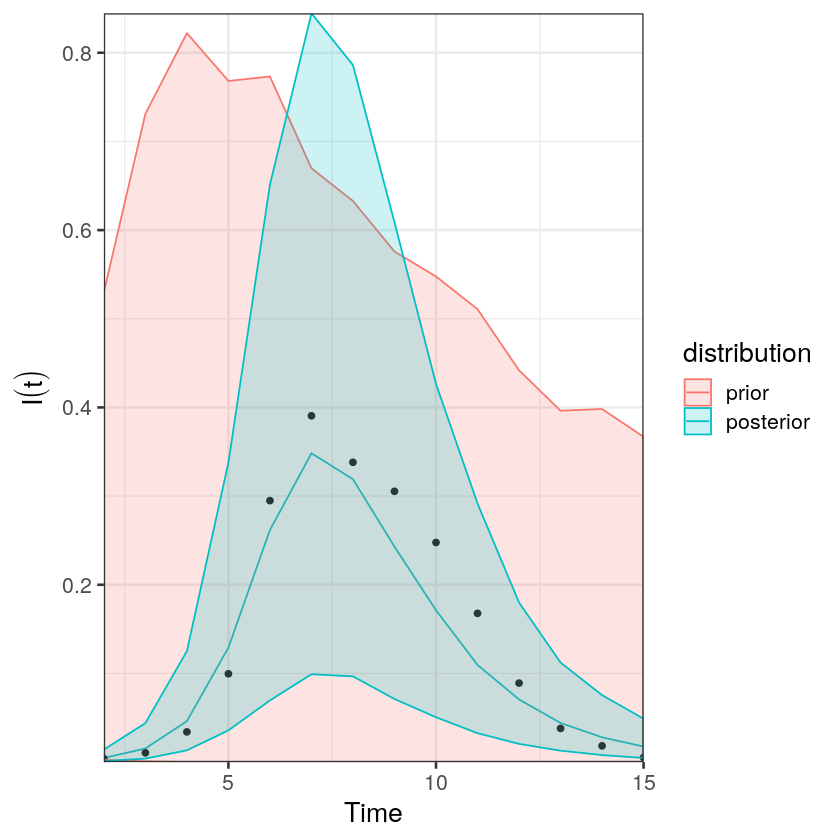

In [35]:
library(ggplot2)

predicted.incidence <- rbind(prior.predicted.incidence, posterior.predicted.incidence)

predictions_SIR <- ggplot(data = predicted.incidence, aes(x = time, y = post_mean,
                                                          colour = distribution, fill = distribution)) +
  geom_line() +
  geom_point(data = data.frame(time = epi.data$ts, I = epi.data$y),
             aes(x = time, y = I), inherit.aes = FALSE) +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2) +
  scale_x_continuous("Time", expand = c(0, 0)) + 
  scale_y_continuous(expression(I(t)), expand = c(0, 0)) + 
  theme_bw(base_size = 16)

predictions_SIR

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

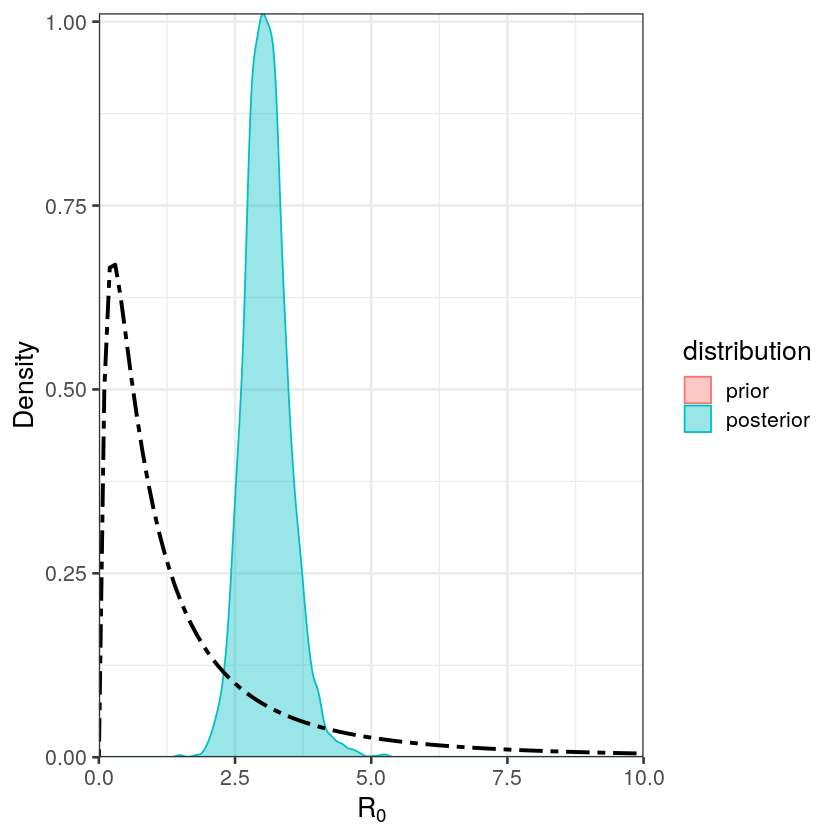

In [36]:
# R0.prior.samples <- data.frame(R0 = rlnorm(n = N, meanlog = mu.r, sdlog = sd.r), distribution = "prior")
R0.posterior.samples <- data.frame(R0 = extract(SIR.posterior, 'R0')$R0, distribution = "posterior")

R0.prior.samples <- data.frame(R0 = rep(NA, N), distribution = "prior")

R0.dt <- rbind(R0.prior.samples,
               R0.posterior.samples)

R0_posterior <- ggplot(data = R0.dt, aes(x = R0, colour = distribution, fill = distribution)) +
  geom_density(alpha = .4) +
#   geom_vline(xintercept = 1.5, linetype = "dotted", size = 1.01) + 
  scale_fill_discrete(drop = FALSE) +
  scale_colour_discrete(drop = FALSE) +
  stat_function(fun = function(x) dlnorm(x, meanlog = mu.r, sdlog = sd.r),
                inherit.aes = FALSE, linetype = "twodash", size = 1.10) +
  scale_x_continuous(expression(R[0]), expand = c(0, 0), limits = c(0, 10)) + 
  scale_y_continuous("Density", expand = c(0, 0)) + 
  theme_bw(base_size = 16)
R0_posterior